<a href="https://colab.research.google.com/github/karthika1498/Decision_tree/blob/main/Decision_tree_assignment(fraud).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

 ### Data Description :

- Undergrad : person is under graduated or not
- Marital.Status : marital status of a person
- Taxable.Income : Taxable income is the amount of how much tax an - - - individual owes to the government 
- Work Experience : Work experience of an individual person
- Urban : Whether that person belongs to urban area or not


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import preprocessing

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
fraud=pd.read_csv("Fraud_check.csv")

In [ ]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
fraud.rename(columns={"Marital.Status":"marital_status","Taxable.Income":"taxable_income","City.Population":"city_population","Work.Experience":"work_experience"},inplace=True)

In [ ]:
fraud.head()

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
fraud.marital_status.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
fraud.Urban.unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
fraud1=fraud.copy()
list=[]
for i in range(0,len(fraud)):
  if fraud["taxable_income"][i]<=30000:
    list.append("Risky")
  elif fraud["taxable_income"][i]>30000:
    list.append("Good")
fraud1["loan_type"]=list
fraud1    

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [ ]:
fraud1.loan_type.unique()

array(['Good', 'Risky'], dtype=object)

In [ ]:
fraud1.value_counts("loan_type")

loan_type
Good     476
Risky    124
dtype: int64

<Axes: xlabel='loan_type', ylabel='count'>

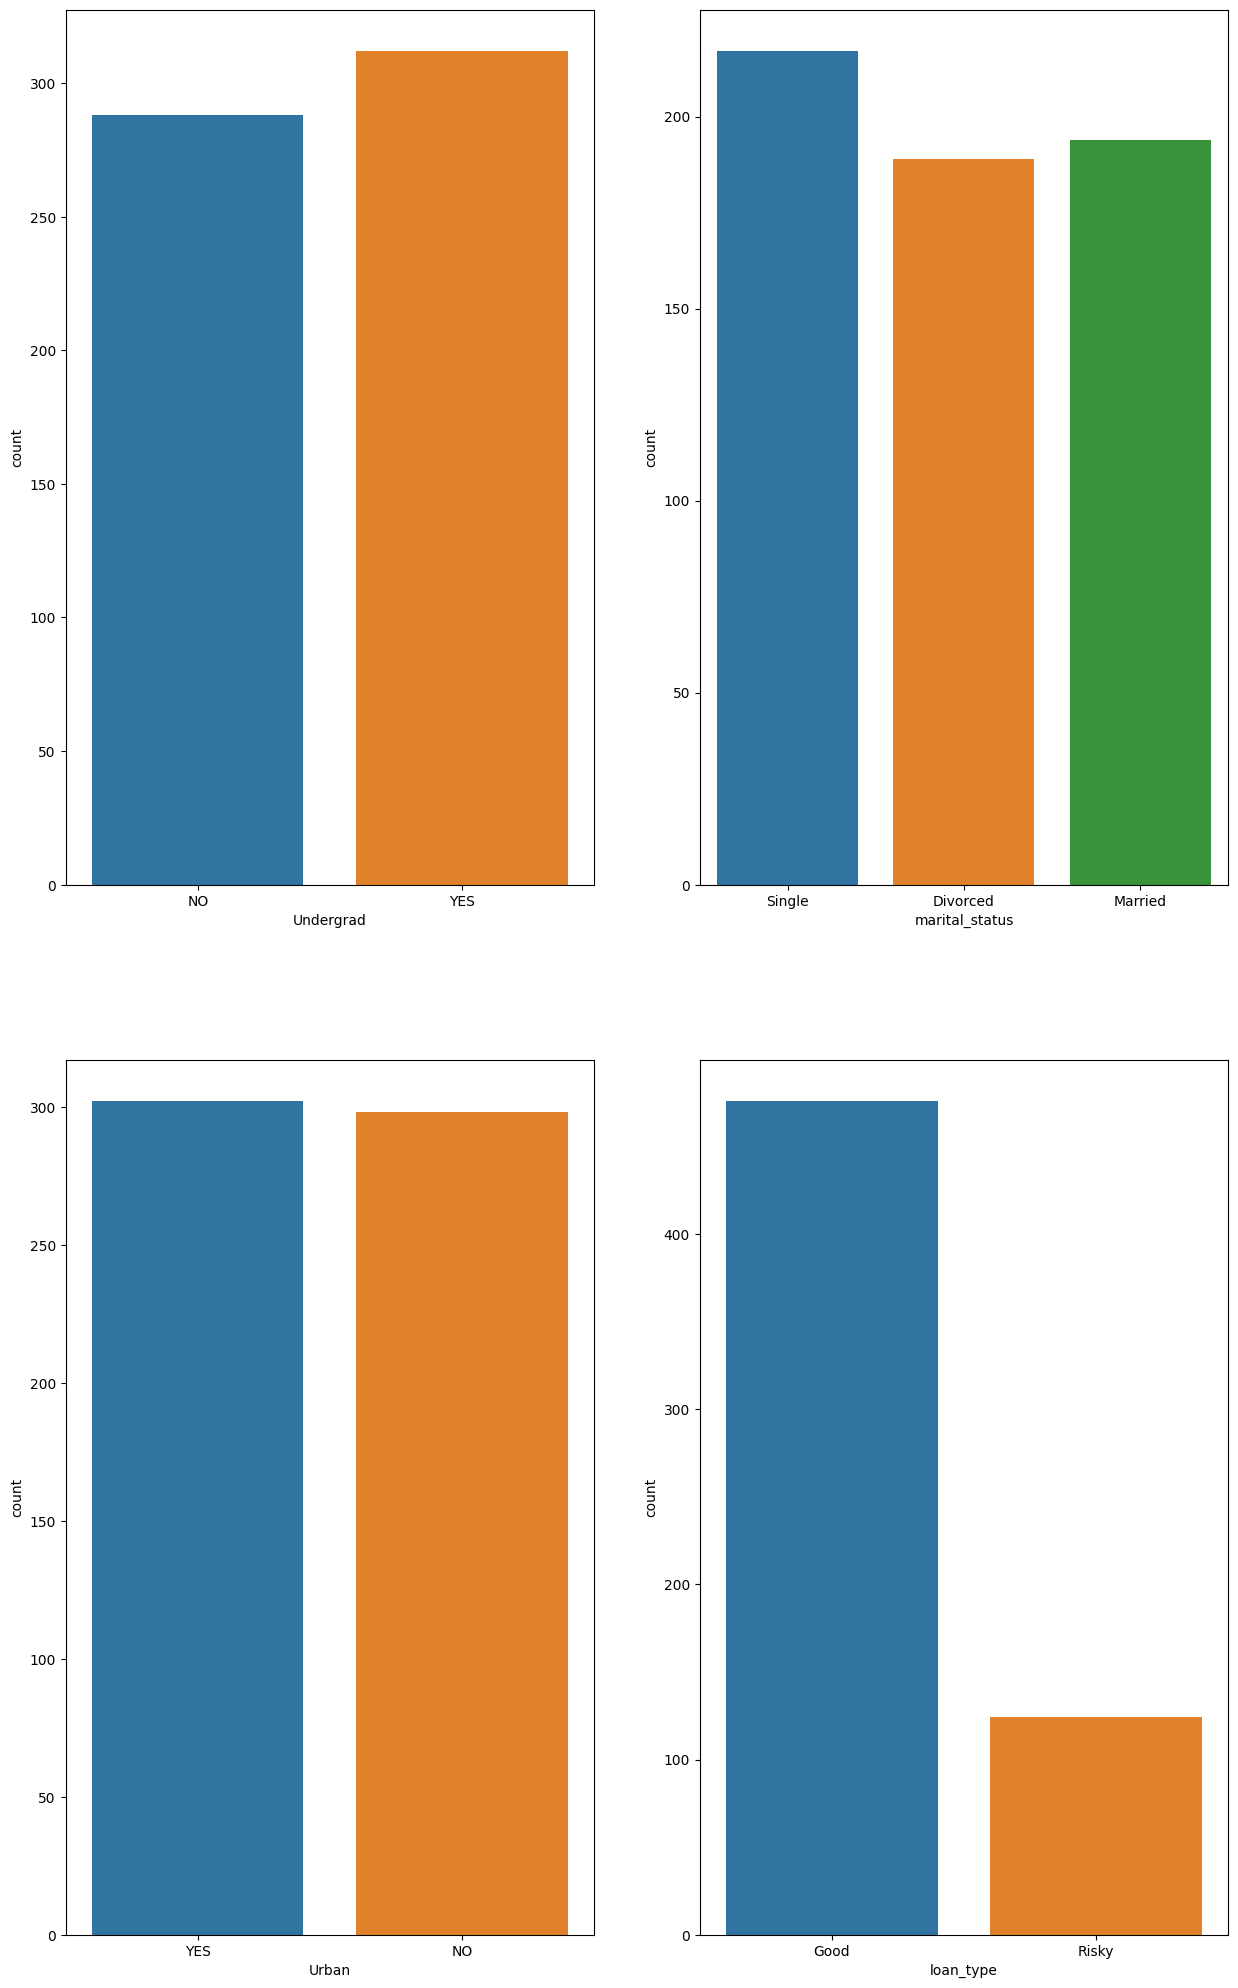

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,25))

sns.countplot(x="Undergrad",data=fraud1,ax=ax[0,0])
sns.countplot(x="marital_status",data=fraud1,ax=ax[0,1])
sns.countplot(x="Urban",data=fraud1,ax=ax[1,0])
sns.countplot(x="loan_type",data=fraud1,ax=ax[1,1])

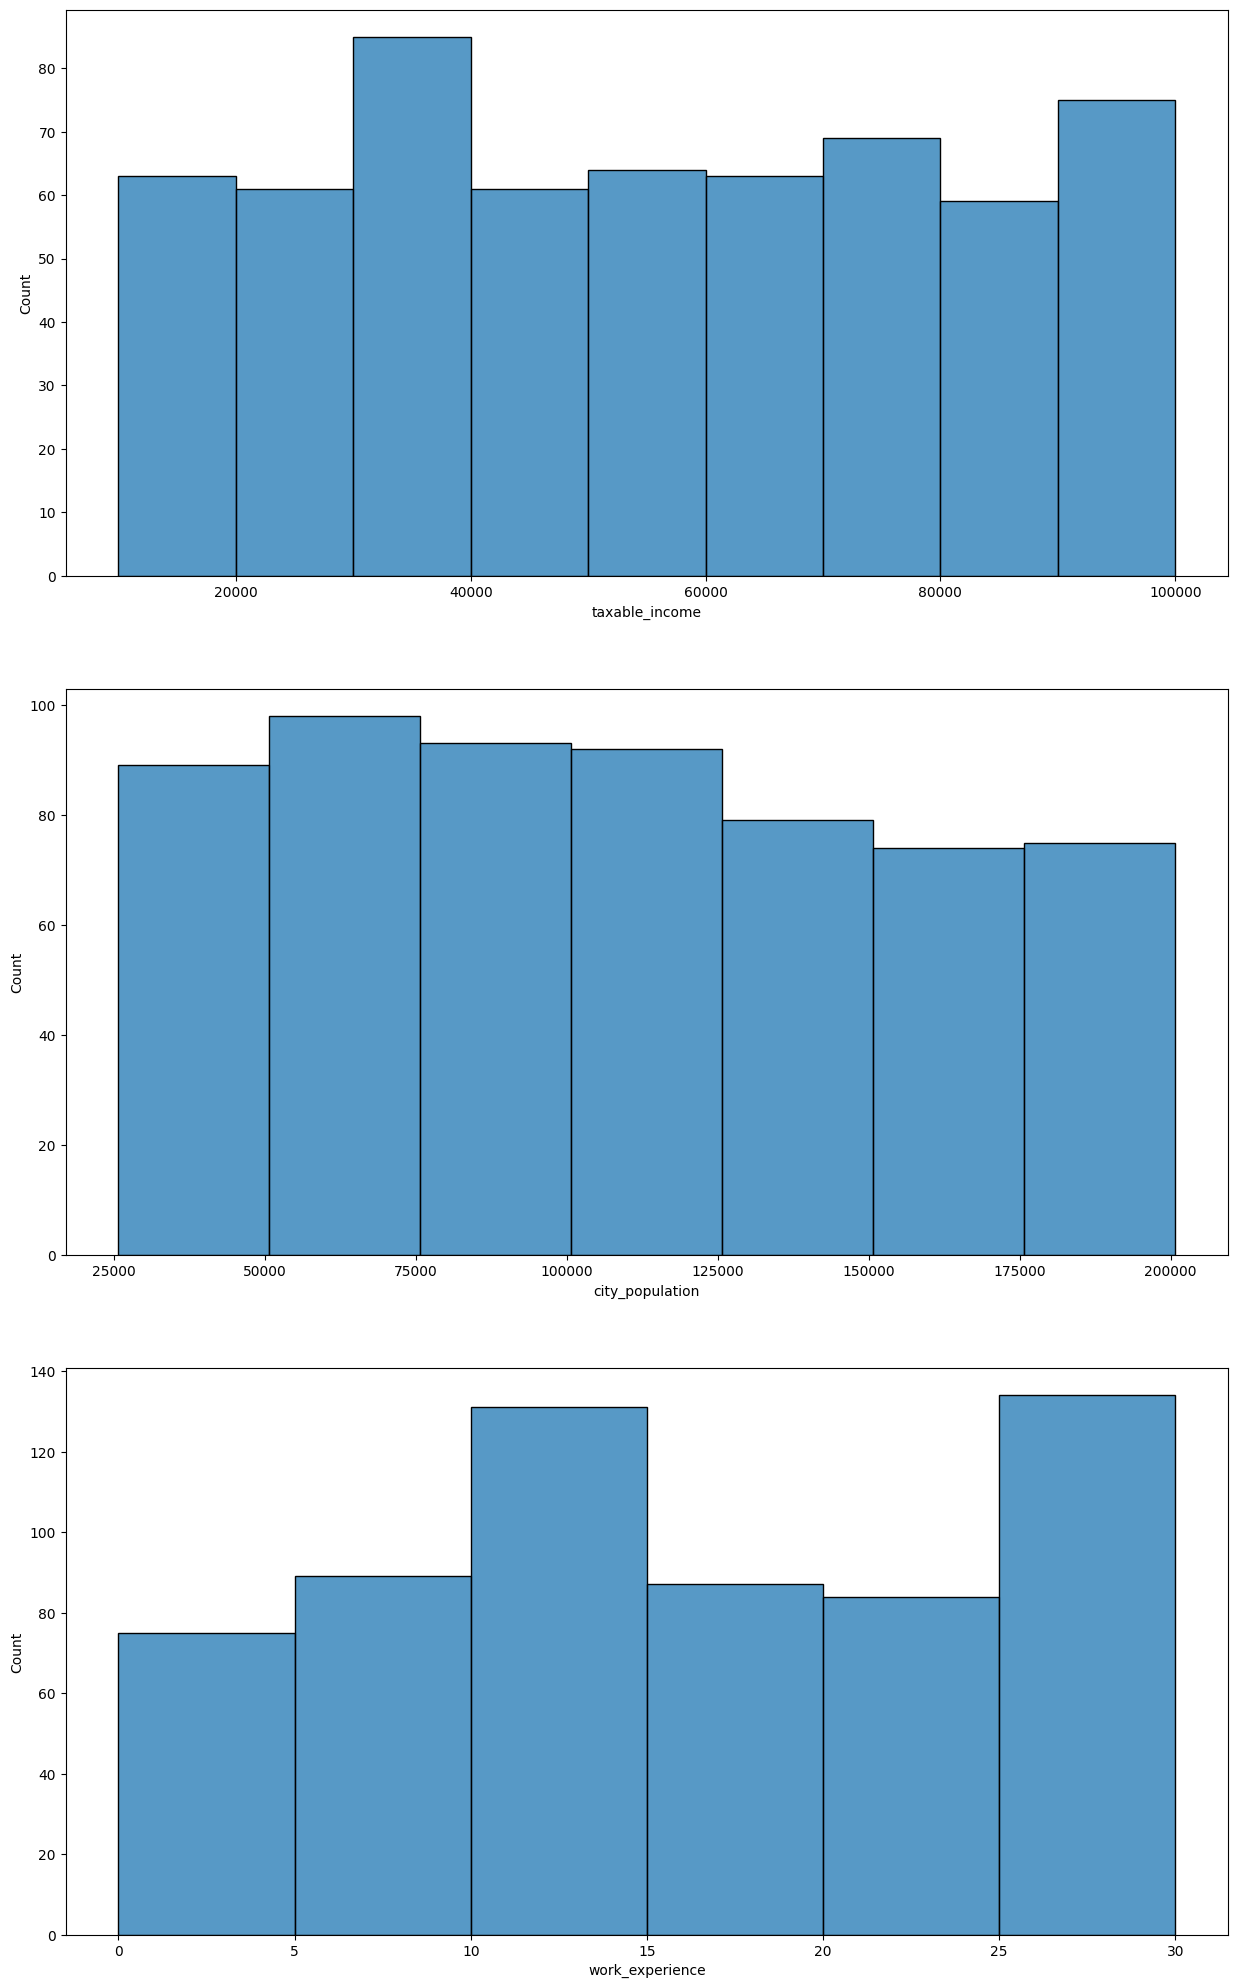

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(15,25))

sns.histplot(x="taxable_income",data=fraud1,ax=ax[0],bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
sns.histplot(x="city_population",data=fraud1,ax=ax[1],bins=range(min(fraud1['city_population']), max(fraud1['city_population']) + 25000, 25000))
sns.histplot(x="work_experience",data=fraud1,ax=ax[2],bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.show()

<Axes: >

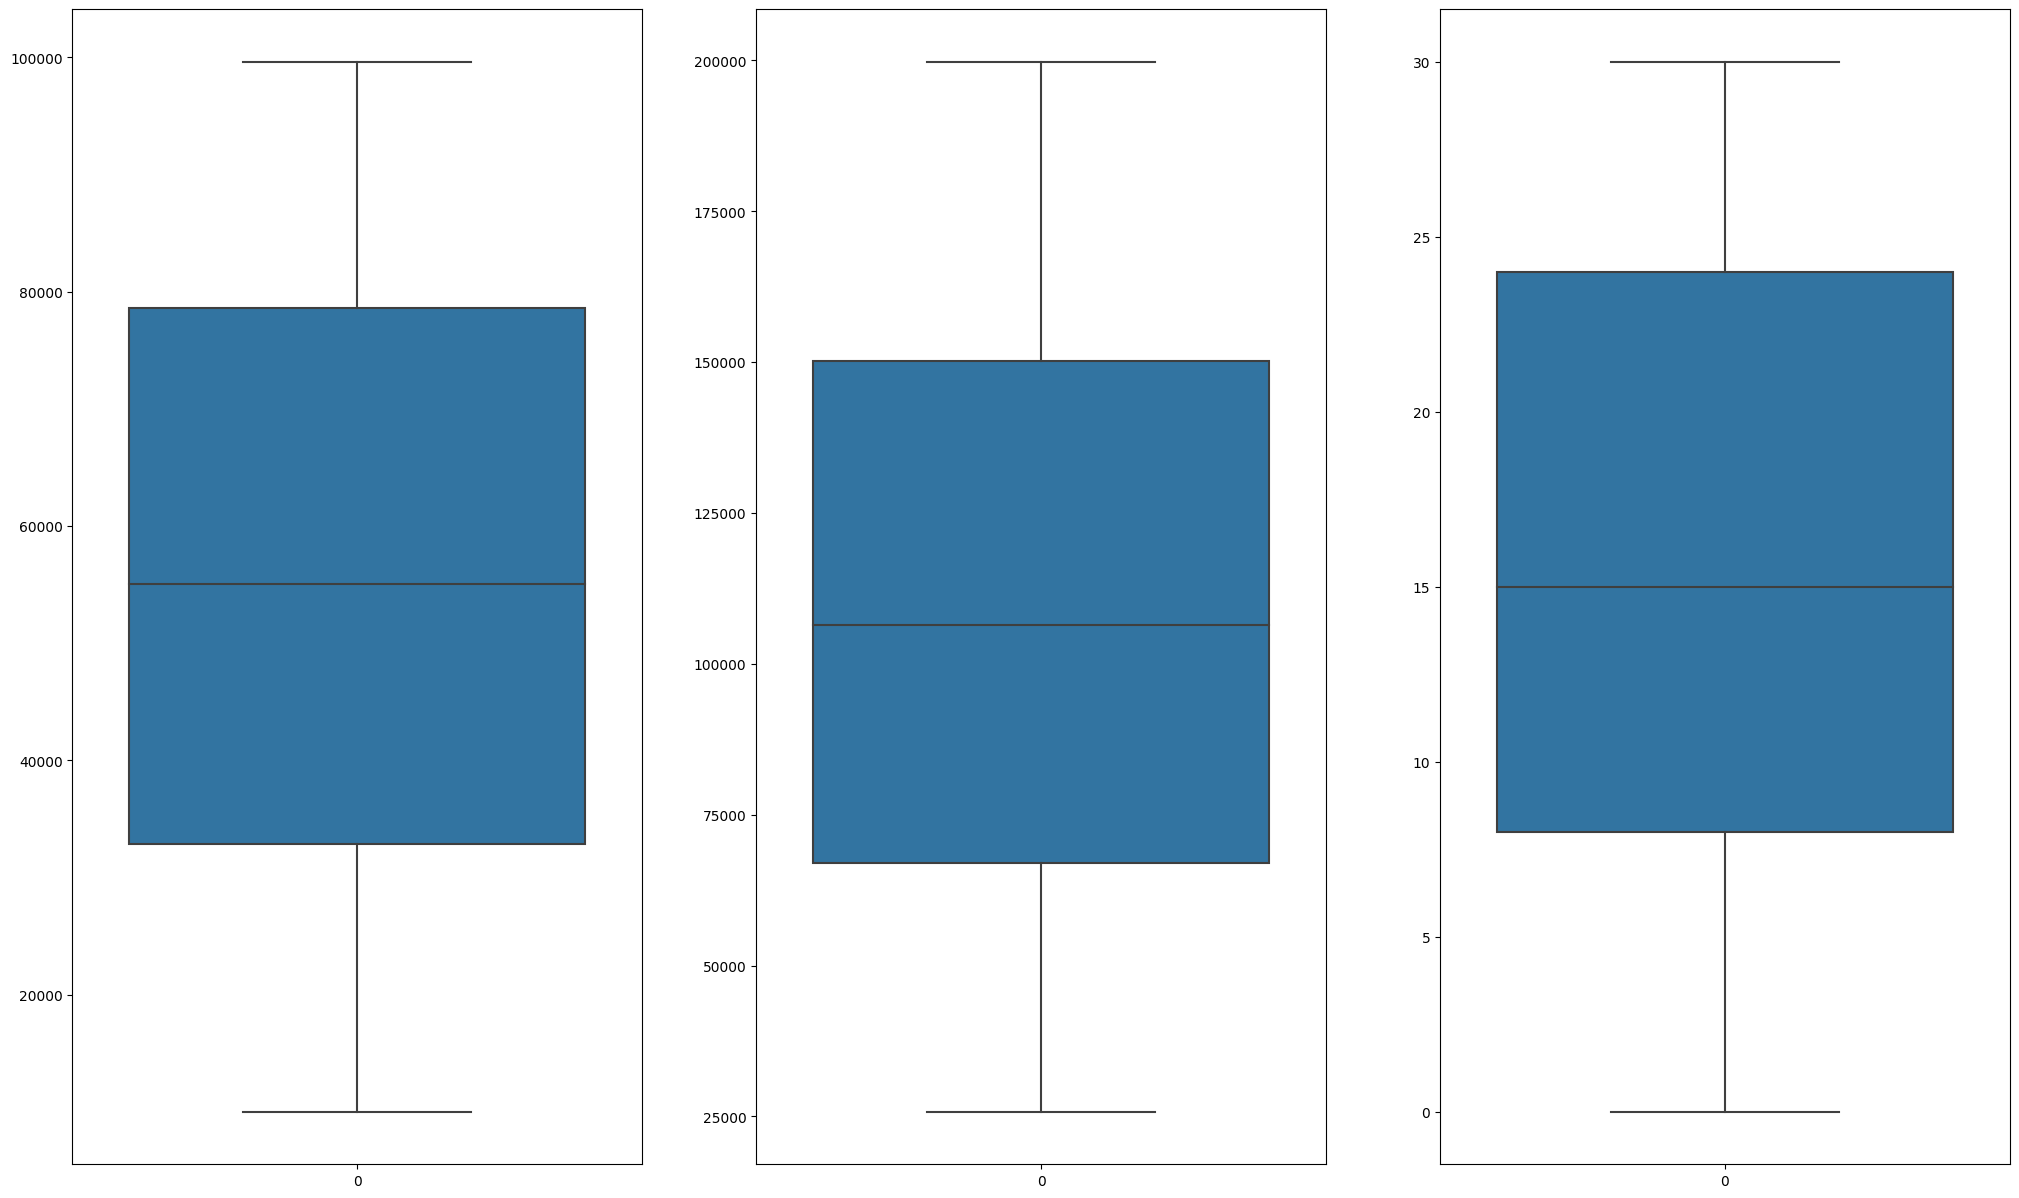

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(1,3,1)
sns.boxplot(fraud1["taxable_income"])

plt.subplot(1,3,2)
sns.boxplot(fraud1["city_population"])

plt.subplot(1,3,3)
sns.boxplot(fraud1["work_experience"])

- univarient analysis

In [ ]:
loan_asset_risky=pd.DataFrame()
loan_asset_good=pd.DataFrame()

loan_asset_risky = fraud1.loc[fraud1['loan_type']=='Risky']

loan_asset_good = fraud1.loc[fraud1['loan_type']=='Good']
     

In [ ]:
loan_asset_risky

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban,loan_type
10,NO,Single,29732,102602,19,YES,Risky
12,NO,Divorced,11794,148033,14,YES,Risky
16,YES,Divorced,24987,34551,29,NO,Risky
19,NO,Single,10987,126953,30,YES,Risky
21,YES,Divorced,14310,29106,7,YES,Risky
...,...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES,Risky
557,YES,Married,12810,157421,10,NO,Risky
567,YES,Single,16316,129912,30,NO,Risky
575,NO,Divorced,10735,95975,13,YES,Risky


- taxable income wrt fraud

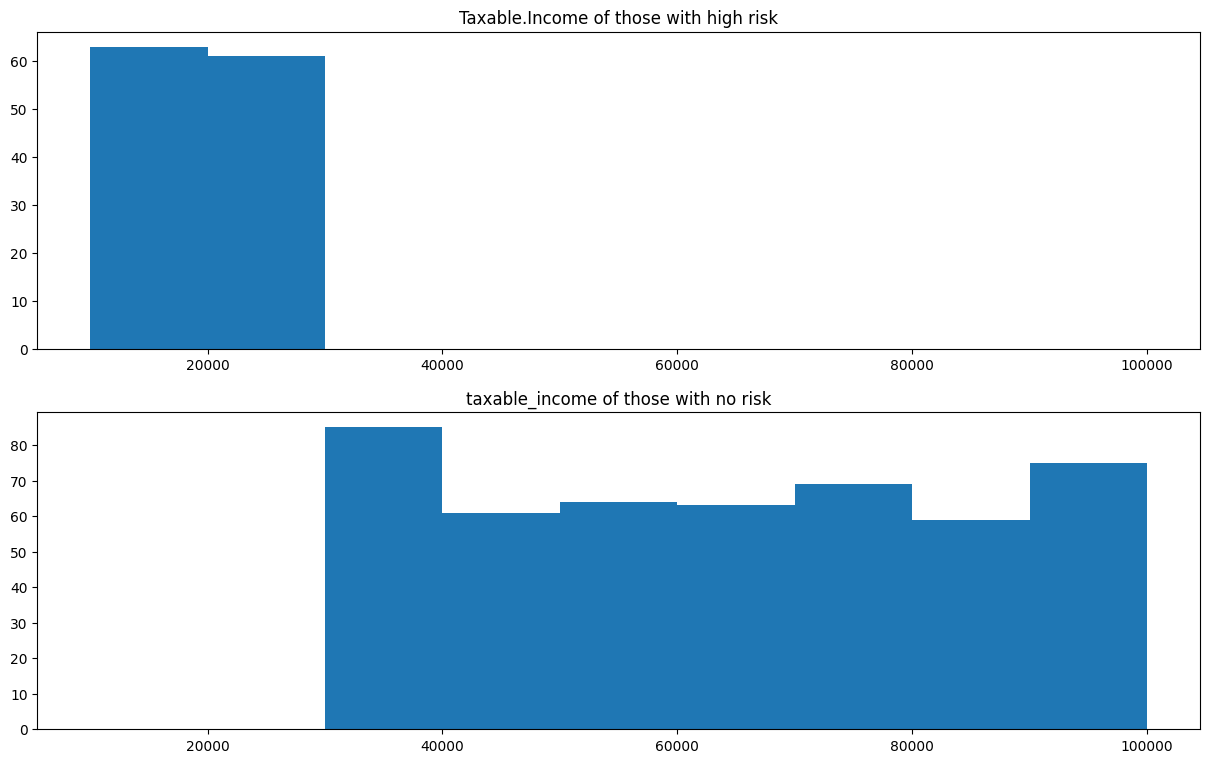

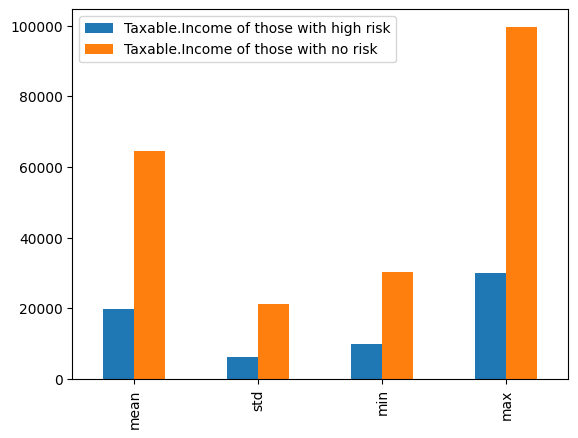

In [ ]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['taxable_income'], bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
plt.title('Taxable.Income of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['taxable_income'],  bins=range(min(fraud1['taxable_income']), max(fraud1['taxable_income']) + 10000, 10000))
plt.title('taxable_income of those with no risk',)



income_describe = pd.DataFrame()

income_describe['Taxable.Income of those with high risk'] = loan_asset_risky['taxable_income'].describe()
income_describe['Taxable.Income of those with no risk'] = loan_asset_good['taxable_income'].describe()
income_describe  = income_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
income_describe.plot.bar()

plt.show() 
     

- work_experience wrt fraud

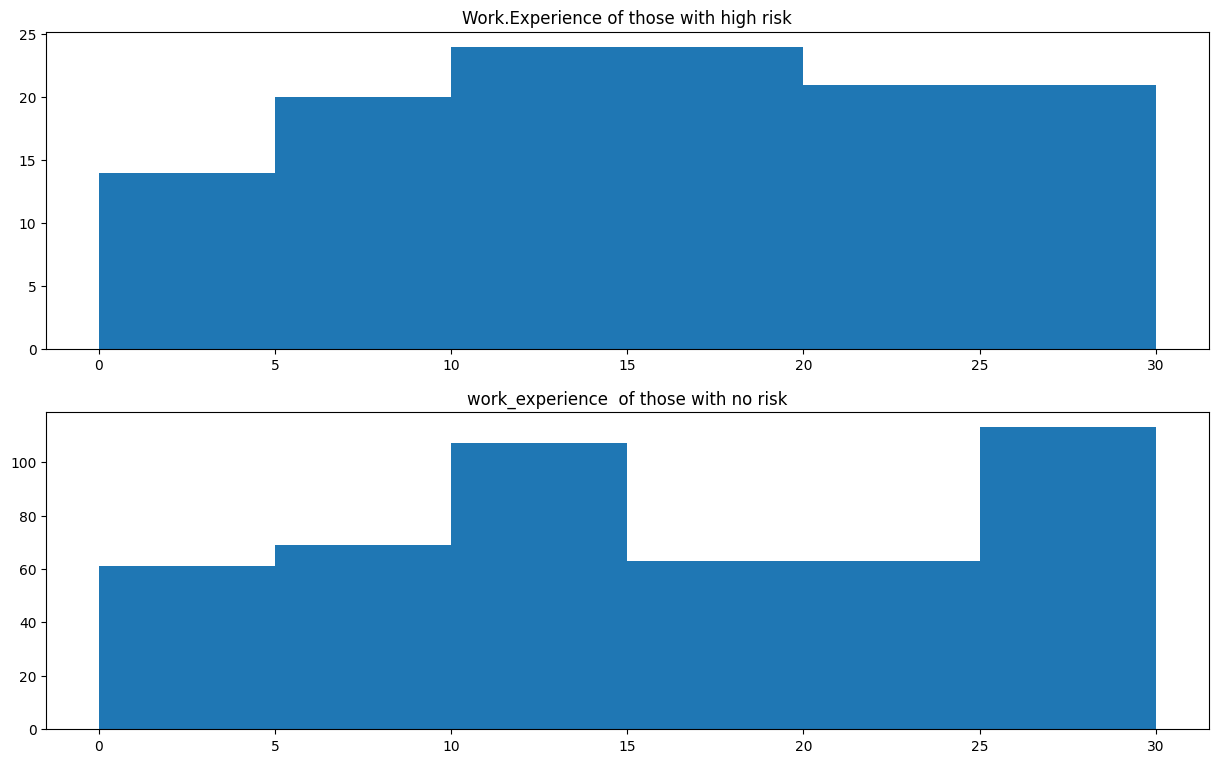

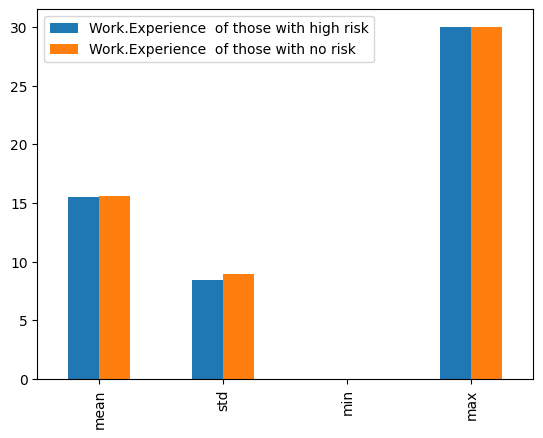

In [ ]:
plt.figure(figsize=(15,14))

plt.subplot(3,1,1)
plt.hist(loan_asset_risky['work_experience'], bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.title('Work.Experience of those with high risk')

plt.subplot(3,1,2)
plt.hist(loan_asset_good['work_experience'],  bins=range(min(fraud1['work_experience']), max(fraud1['work_experience']) + 5, 5))
plt.title('work_experience  of those with no risk',)



exp_describe = pd.DataFrame()

exp_describe['Work.Experience  of those with high risk'] = loan_asset_risky['work_experience'].describe()
exp_describe['Work.Experience  of those with no risk'] = loan_asset_good['work_experience'].describe()
exp_describe = exp_describe.drop(['count', '25%', '50%', '75%'])

plt.subplot(3,1,2)
exp_describe.plot.bar()

plt.show() 

- undergrade wrt fraud

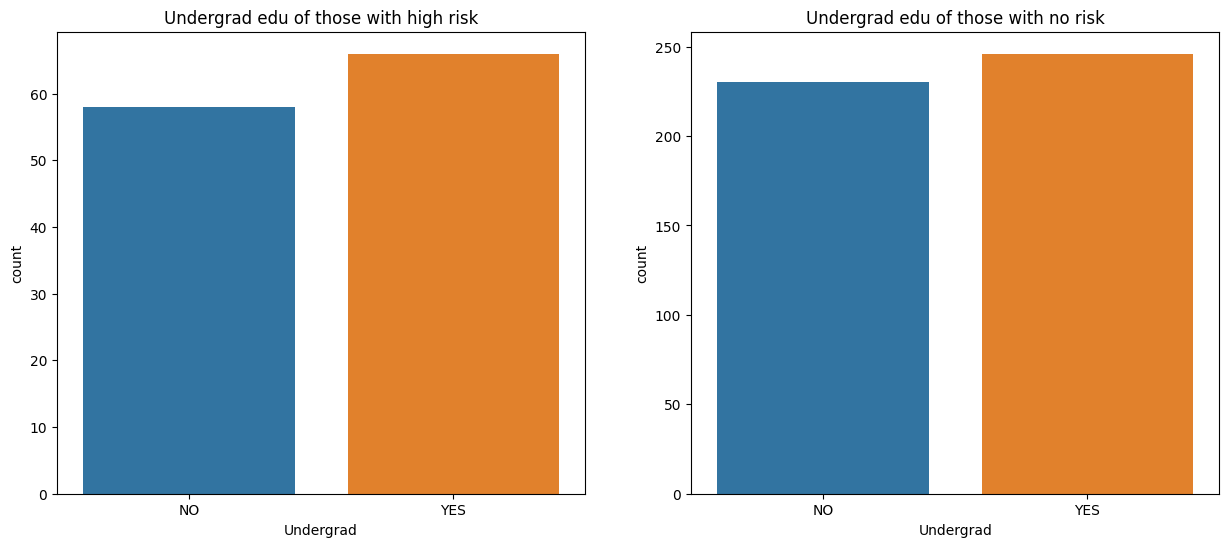

In [ ]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(data=loan_asset_risky,x='Undergrad')
plt.title('Undergrad edu of those with high risk')

plt.subplot(1,2,2)
sns.countplot(data=loan_asset_good,x='Undergrad')
plt.title('Undergrad edu of those with no risk')

plt.show()

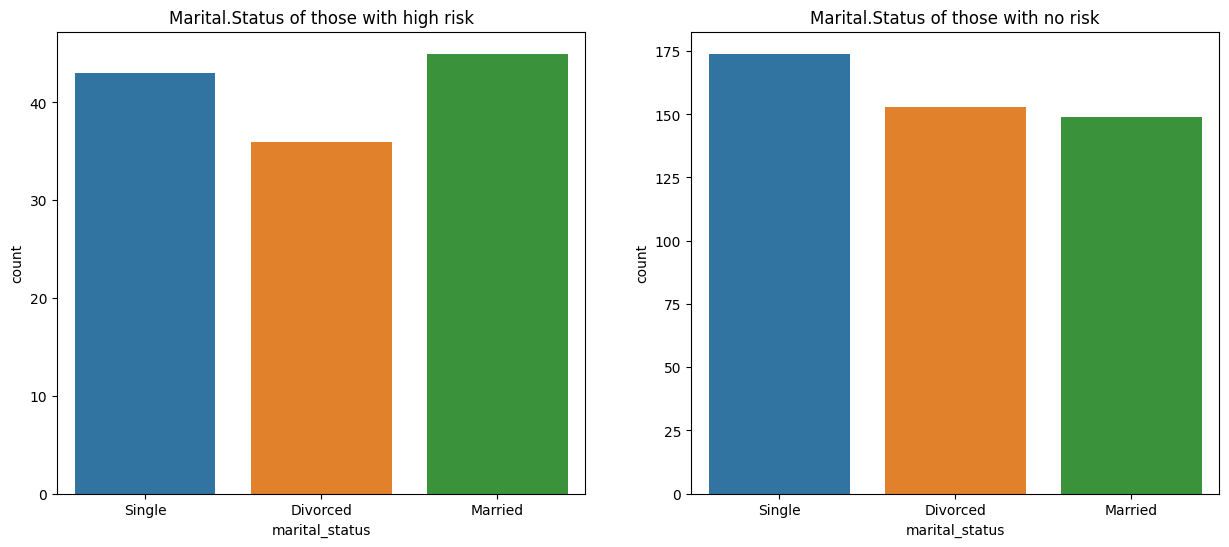

In [ ]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(x="marital_status",data=loan_asset_risky)
plt.title('Marital.Status of those with high risk')

plt.subplot(1,2,2)
sns.countplot(x='marital_status',data=loan_asset_good)
plt.title('Marital.Status of those with no risk',)

plt.show()

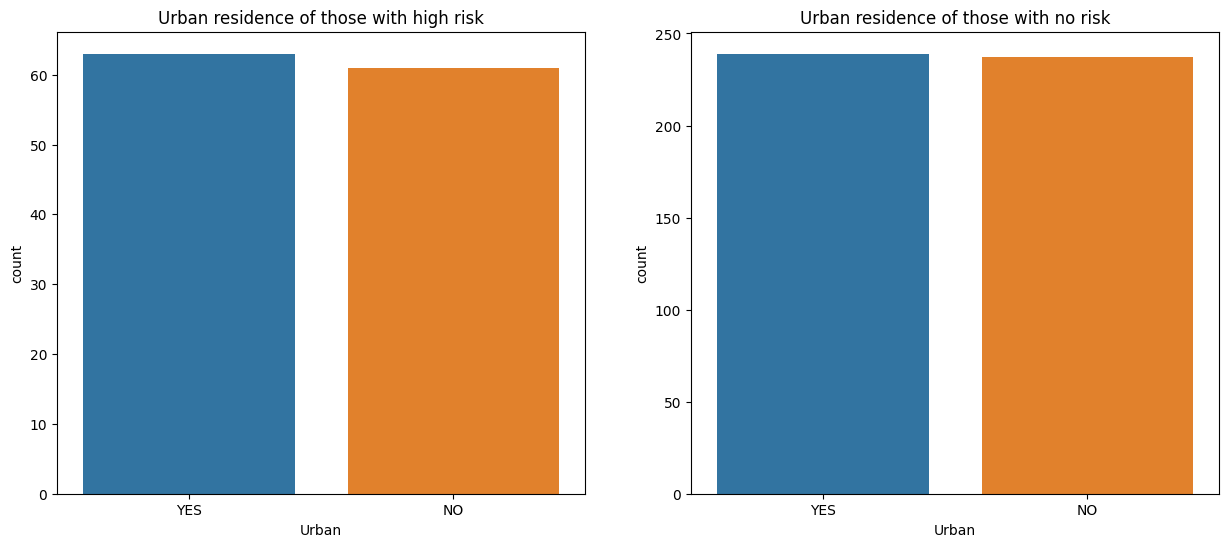

In [ ]:
plt.figure(figsize=(15,6)) 

plt.subplot(1,2,1)
sns.countplot(data=loan_asset_risky,x='Urban')
plt.title('Urban residence of those with high risk')

plt.subplot(1,2,2)
sns.countplot(data=loan_asset_good,x='Urban')
plt.title('Urban residence of those with no risk',)

plt.show()

- data preprocessing

In [ ]:
x=fraud1.iloc[:,:-1]
y=fraud1.iloc[:,-1]

In [ ]:
x.head()

,Undergrad,marital_status,taxable_income,city_population,work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
y.head()


0    Good
1    Good
2    Good
3    Good
4    Good
Name: loan_type, dtype: object

In [ ]:
x=pd.get_dummies(x)

In [ ]:
x.head()

,taxable_income,city_population,work_experience,Undergrad_NO,Undergrad_YES,marital_status_Divorced,marital_status_Married,marital_status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [ ]:
label=LabelEncoder()
y=label.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 10)
(120, 10)
(480,)
(120,)


- building decision tree

In [ ]:
#using entropy criteria
model=DecisionTreeClassifier(criterion="entropy",max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
pred=model.predict(x_test)

In [ ]:
np.mean(pred==y_test) 

1.0

In [ ]:
confusion_matrix(y_test,pred)

array([[95,  0],
       [ 0, 25]])

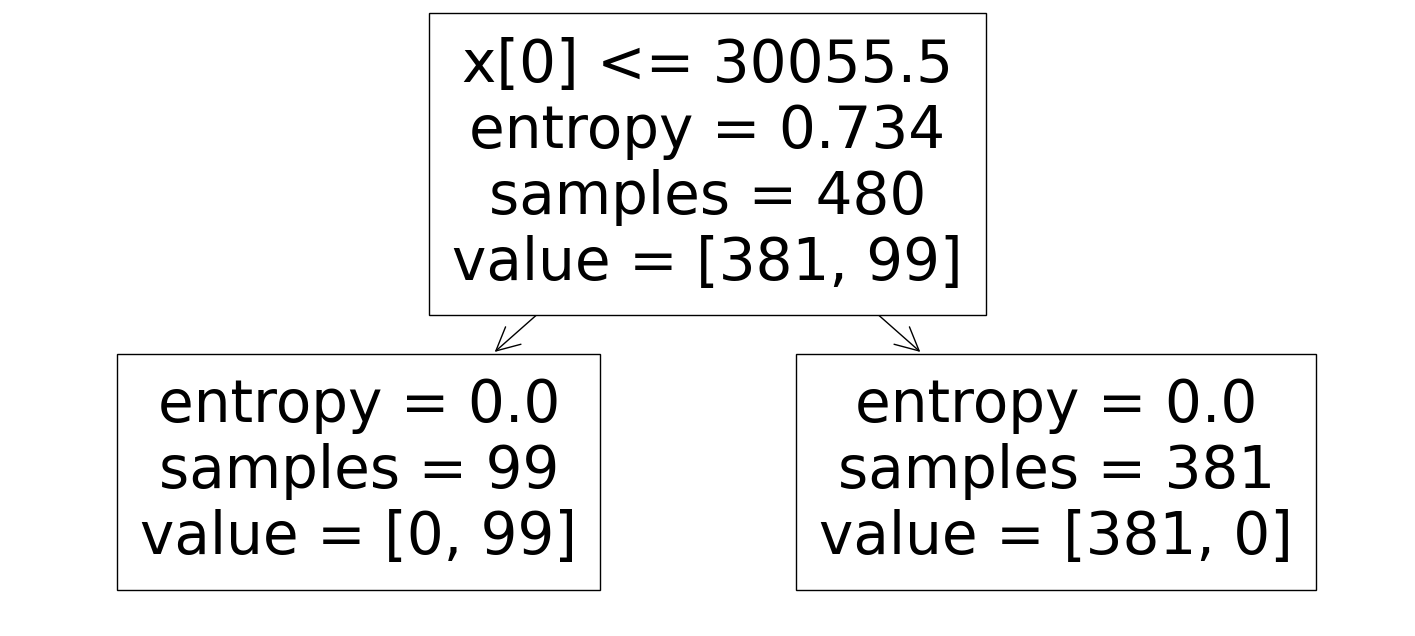

In [ ]:
plt.figure(figsize=(18,8)) 
tree.plot_tree(model)
plt.show()

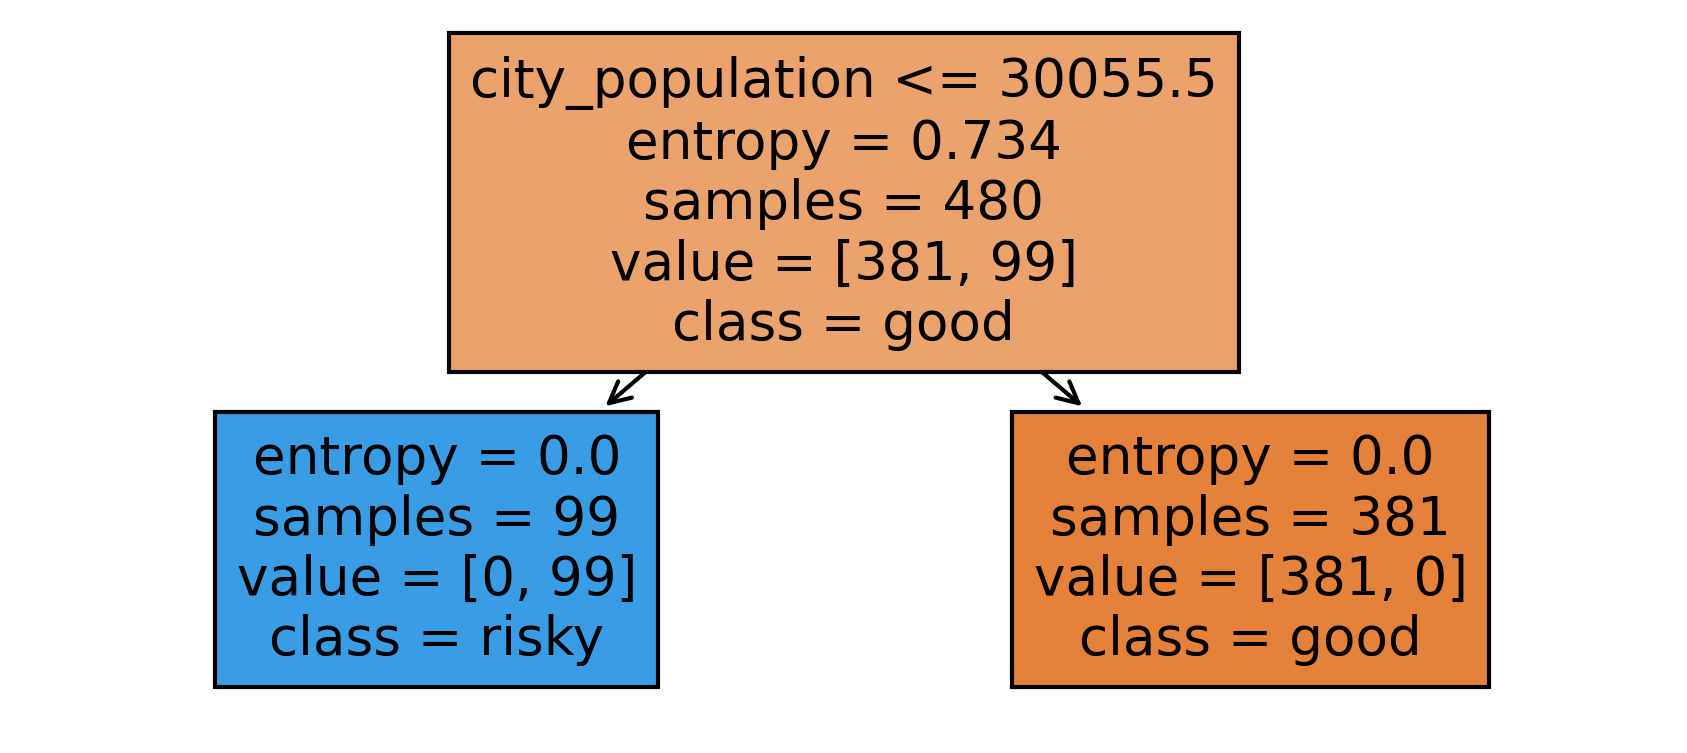

In [ ]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (7,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

- using gini cretiria build the model

In [ ]:
model=DecisionTreeClassifier(criterion="gini",max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,pred)

1.0

In [ ]:
confusion_matrix(y_test,pred)

array([[95,  0],
       [ 0, 25]])

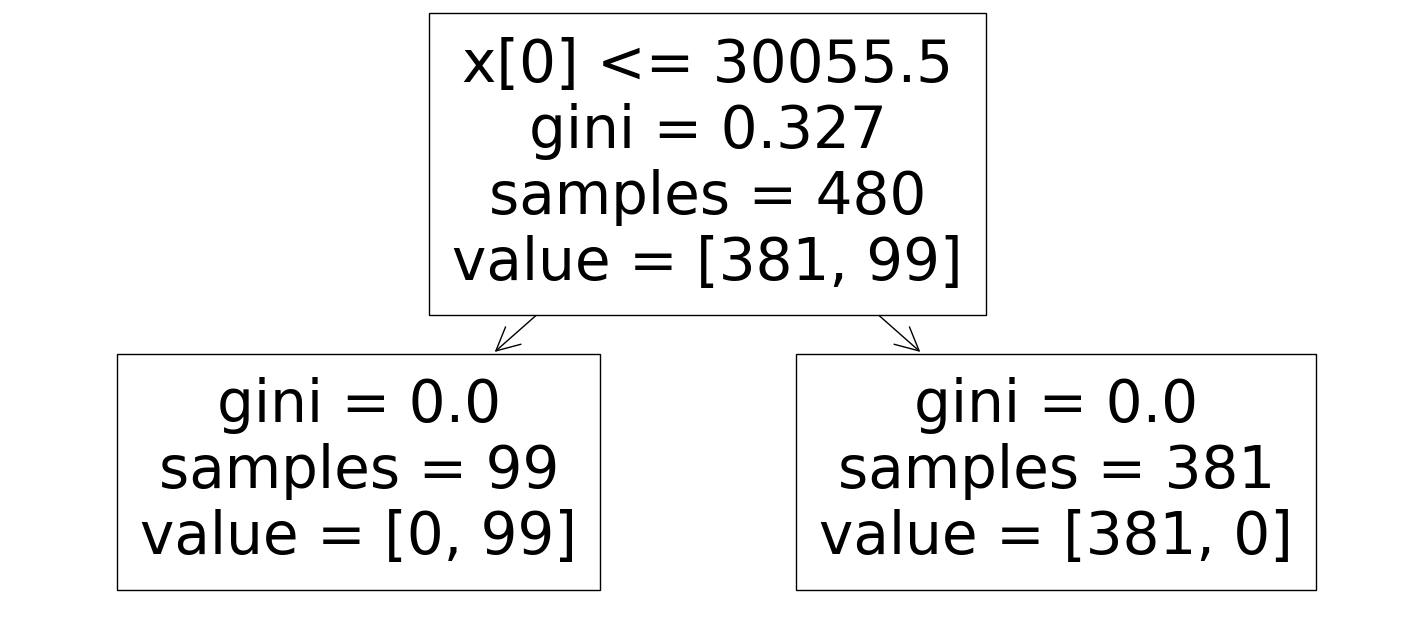

In [ ]:

plt.figure(figsize=(18,8))
tree.plot_tree(model)
plt.show()

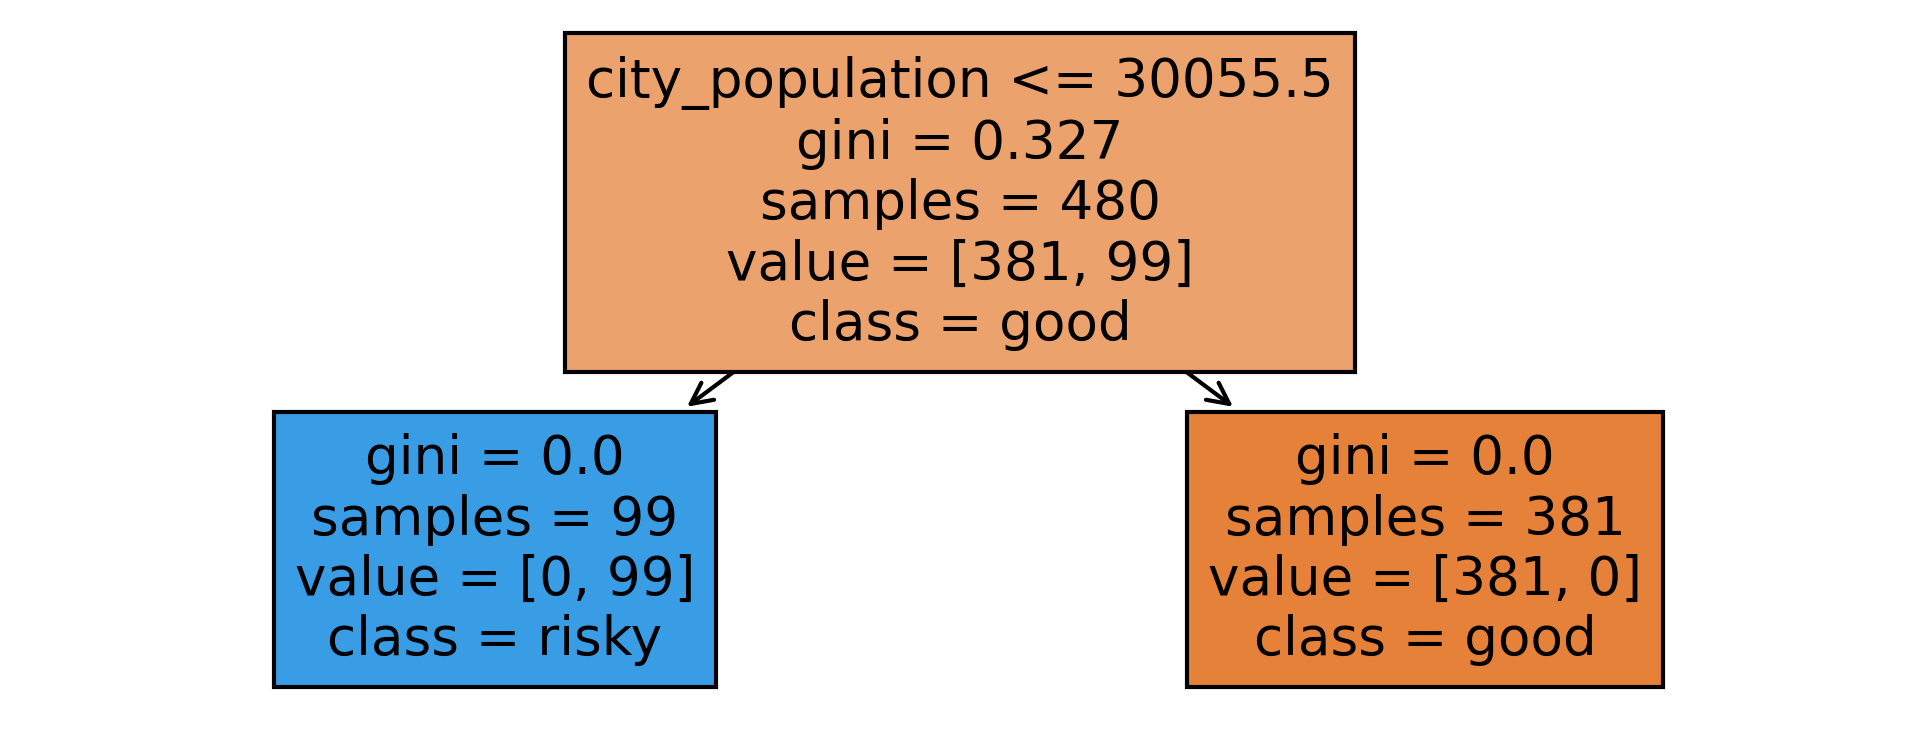

In [ ]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,3), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

- grid search for hyperparameter tuning

In [ ]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [ ]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

In [ ]:
model=DecisionTreeClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_dict,cv=kfold)

In [ ]:
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9983333333333334


- building model using best hyperparameter

In [ ]:
kfold=KFold(n_splits=10,shuffle=True,random_state=0)

In [ ]:
model_kf=grid.best_estimator_
model_kf.fit(x,y)

DecisionTreeClassifier(max_depth=1)

In [ ]:
result=cross_val_score(model_kf,x,y,cv=kfold)
print(result.mean()*100)

99.83333333333334


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<Axes: >

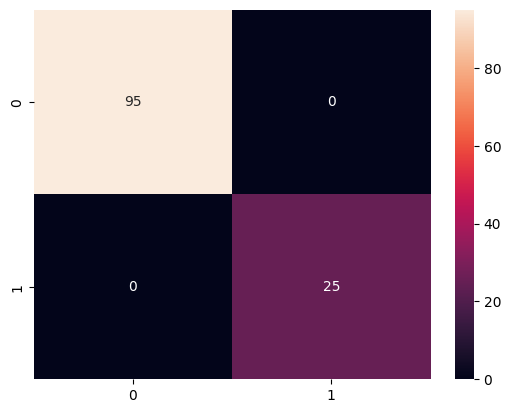

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

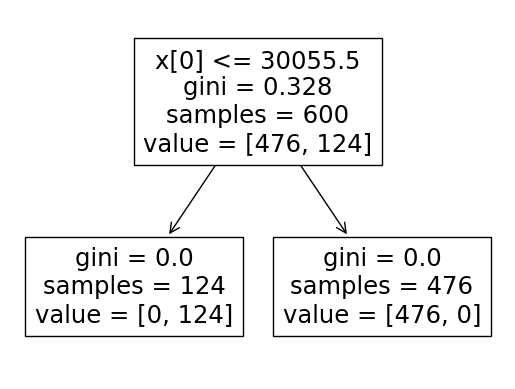

In [ ]:
#PLot the decision tree
tree.plot_tree(model_kf)

plt.show()
    

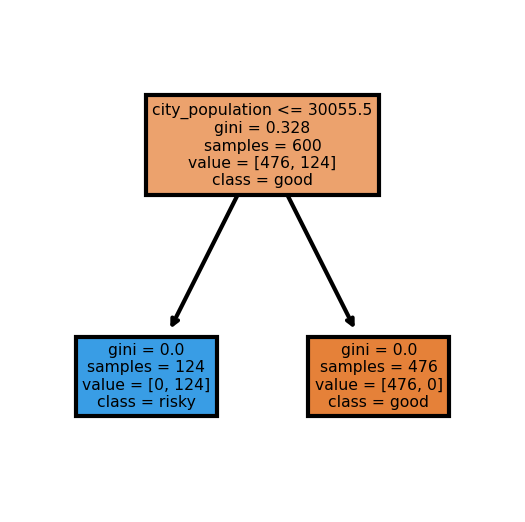

In [ ]:
fn=['city_population','workxp','undergrad_NO','undergrad_YES','marital_status_Divorced','marital_status_Married','marital_status_Single','urban_NO','urban_YES']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(model_kf,
               feature_names = fn, 
               class_names=cn,
               filled = True);